In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

missing values
null values
outliers

In [3]:
transaction_data = pd.read_excel(r'QVI_transaction_data.xlsx')
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Data Cleaning

In [4]:
#Checking the data types
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [5]:
import re
from collections import Counter

# Split product names into individual words
product_names = transaction_data['PROD_NAME'].unique()  # Get unique product names
all_words = []

for product in product_names:
    words = product.split()  # Split product name into words
    all_words.extend(words) 

    # Step 2: Remove words containing digits or special characters
cleaned_words = [word for word in all_words if not re.search(r'\d|\W', word)]

# Step 3: Count the frequency of each word
word_counts = Counter(cleaned_words)

# Convert the word counts into a DataFrame for easier viewing
word_count_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Sort the words by frequency in descending order
word_count_df = word_count_df.sort_values(by='Frequency', ascending=False)

# Display the top frequent words
print("Most frequent words in PROD_NAME:")
print(word_count_df.head(20))

Most frequent words in PROD_NAME:
         Word  Frequency
9       Chips         21
6      Smiths         16
8         Cut         14
7     Crinkle         14
12     Kettle         13
22       Salt         12
5      Cheese         12
40   Original         10
18      Salsa          9
28    Doritos          9
1        Chip          9
29       Corn          8
60   Pringles          8
119       RRD          8
37         WW          7
10    Chicken          7
54        Sea          6
32       Sour          6
38      Thins          5
102    Crisps          5


In [6]:
# Add a column indicating whether a product contains the word "salsa"
transaction_data['IS_SALSA'] = transaction_data['PROD_NAME'].str.contains('salsa', case=False)

# Remove salsa-related products
transaction_data = transaction_data[~transaction_data['IS_SALSA']]

# Drop the 'IS_SALSA' column now that it's no longer needed
transaction_data = transaction_data.drop(columns=['IS_SALSA'])

# Display cleaned data
print("Cleaned transaction data (without salsa):")
transaction_data.head()

Cleaned transaction data (without salsa):


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
# Checking for outliers
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [9]:
#Checking for outliers
transaction_data[transaction_data['PROD_QTY'] > 20]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [10]:
# To remove outlier
outlier_to_remove = transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000].index

transaction_data.drop(index=outlier_to_remove, inplace=True)

In [11]:
#Rechecking for outliers
transaction_data[transaction_data['PROD_QTY'] > 20]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [12]:
# Count transaction by date
transaction_data.groupby('DATE')['TOT_SALES'].count()

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: TOT_SALES, Length: 364, dtype: int64

What is the Trend of Transanction Over Time

In [13]:
# Create a sequence of all dates from 1 Jul 2018 to 30 Jun 2019
full_date_range = pd.date_range(start="2018-07-01", end="2019-06-30")

# Create a DataFrame for the full date range
date_range_df = pd.DataFrame(full_date_range, columns=['DATE'])

# Group transactions by date to count the number of transactions per day
transactions_by_date = transaction_data.groupby('DATE').size().reset_index(name='TRANSACTION_COUNT')

# Merge the transaction counts with the full date range
merged_data = date_range_df.merge(transactions_by_date, on='DATE', how='left')

# Fill missing transaction counts with 0
merged_data['TRANSACTION_COUNT'].fillna(0, inplace=True)

# Identify missing dates
missing_dates = merged_data[merged_data['TRANSACTION_COUNT'] == 0]['DATE']
print("Missing dates:", missing_dates.tolist())

Missing dates: [Timestamp('2018-12-25 00:00:00')]


C:\Users\allen\AppData\Local\Temp\ipykernel_6908\2690952987.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['TRANSACTION_COUNT'].fillna(0, inplace=True)


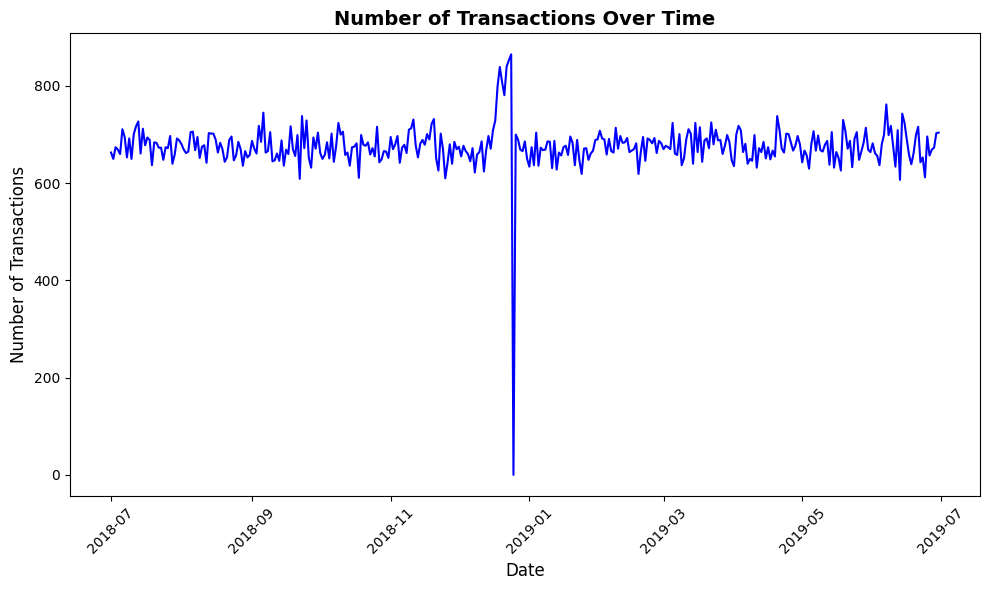

In [14]:
# Plot transaction over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='DATE', y='TRANSACTION_COUNT', color='blue')

# Set plot titles and labels
plt.title('Number of Transactions Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

 What is the Trend of Transanction in December only

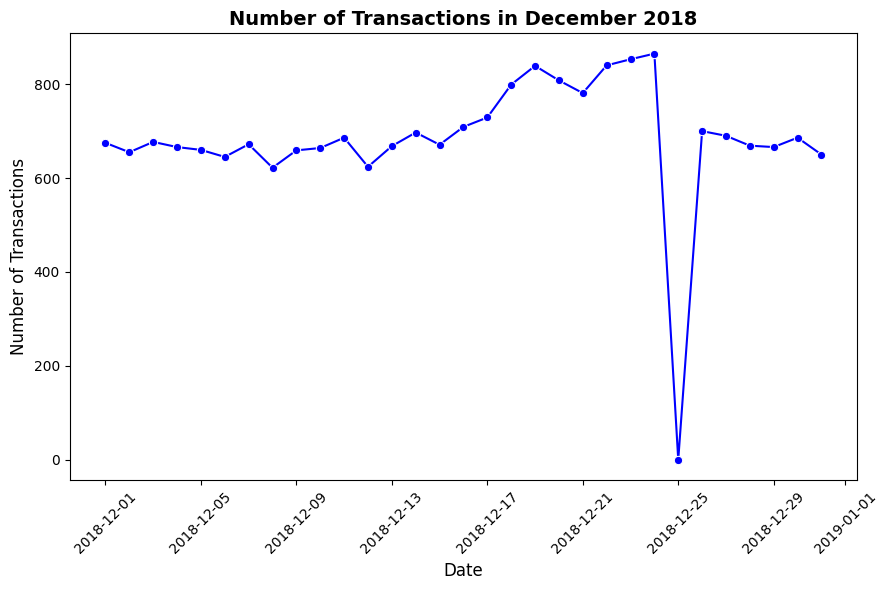

In [49]:
# Filter the data to only include December 2018
december_data = merged_data[(merged_data['DATE'].dt.month == 12) & (merged_data['DATE'].dt.year == 2018)]

# Plot the number of transactions in December
plt.figure(figsize=(9, 6))
sns.lineplot(data=december_data, x='DATE', y='TRANSACTION_COUNT', marker='o', color='blue')

# Set plot titles and labels
plt.title('Number of Transactions in December 2018', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


Does the size of the pack influence sales?

In [16]:
import re
# Create a Function to extract numbers from PROD_NAME
def extract_pack_size(prod_name):
    match = re.search(r'\d+', prod_name)  # Extract the first number found in the PROD_NAME
    return int(match.group()) if match else None  # Return the number or None if no match

# Create the 'PACK_SIZE' column by applying the function to 'PROD_NAME'
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].apply(extract_pack_size)

# Check the distribution of pack sizes to see if they look sensible
pack_size_counts = transaction_data.groupby('PACK_SIZE').size().reset_index(name='COUNT')
pack_size_counts_sorted = pack_size_counts.sort_values('PACK_SIZE')

# Display the sorted pack sizes and their counts
pack_size_counts_sorted


,PACK_SIZE,COUNT
0,70,1507
1,90,3008
2,110,22387
3,125,1454
4,134,25102
5,135,3257
6,150,40203
7,160,2970
8,165,15297
9,170,19983


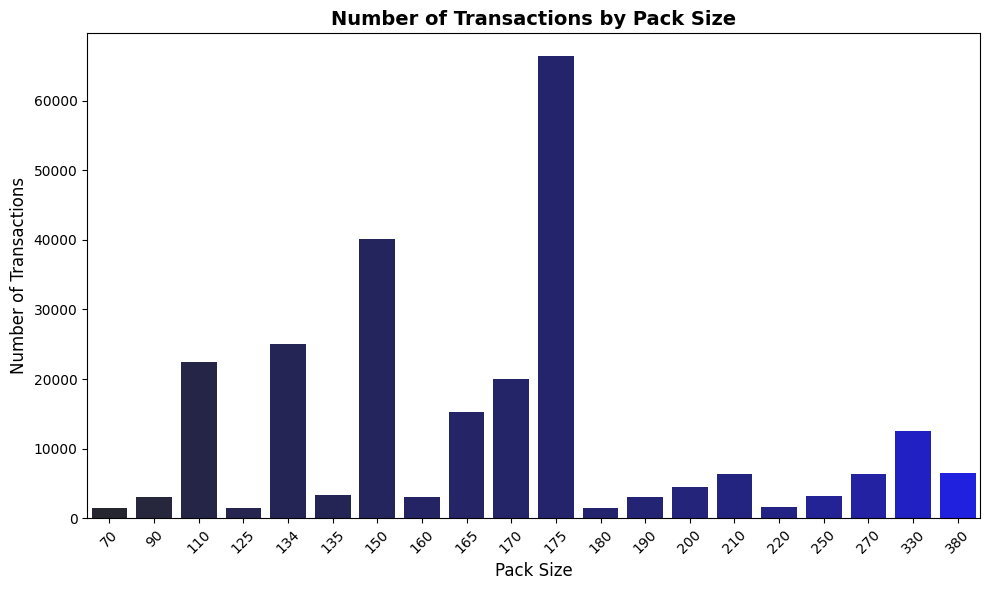

In [17]:
# Plot size pack over sales
plt.figure(figsize=(10, 6))
sns.countplot(data=transaction_data, x='PACK_SIZE', palette='dark:b', hue='PACK_SIZE', legend = False)

plt.title('Number of Transactions by Pack Size', fontsize=14, fontweight='bold')
plt.xlabel('Pack Size', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [19]:
# Create a new column 'BRAND' by extracting the first word from the 'PROD_NAME'
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0] #To split by first name 

transaction_data[['PROD_NAME', 'BRAND']].head()


,PROD_NAME,BRAND
0,Natural Chip Compny SeaSalt175g,Natural
1,CCs Nacho Cheese 175g,CCs
2,Smiths Crinkle Cut Chips Chicken 170g,Smiths
3,Smiths Chip Thinly S/Cream&Onion 175g,Smiths
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle


In [20]:
# Replace brand variations to standardize
transaction_data['BRAND'] = transaction_data['BRAND'].replace({"RED": "RRD",   "RRD": "Red Rock Deli"})

# Example: check the updated brand column to see if other variations need to be fixed
#transaction_data['BRAND'].value_counts()
transaction_data[['PROD_NAME', 'BRAND']].head()


,PROD_NAME,BRAND
0,Natural Chip Compny SeaSalt175g,Natural
1,CCs Nacho Cheese 175g,CCs
2,Smiths Crinkle Cut Chips Chicken 170g,Smiths
3,Smiths Chip Thinly S/Cream&Onion 175g,Smiths
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle


In [21]:
transaction_data[transaction_data['BRAND'] == 'RRD']


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND


What are the top 5 purchased brand?

In [22]:
top_5_brand = transaction_data.groupby('BRAND')['PROD_QTY'].sum().sort_values(ascending=False).reset_index().head()
top_5_brand 

,BRAND,PROD_QTY
0,Kettle,79051
1,Smiths,51973
2,Pringles,48019
3,Doritos,42222
4,Thins,26929


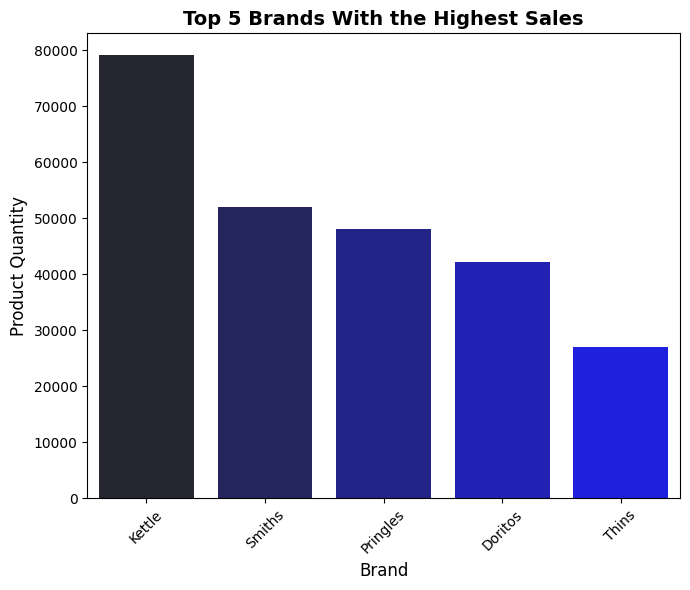

In [23]:
# Plot top 5 brands with highests sales
plt.figure(figsize=(7, 6))
sns.barplot(data=top_5_brand, x='BRAND', y = 'PROD_QTY', palette='dark:b',hue='BRAND', legend=None)

plt.title('Top 5 Brands With the Highest Sales', fontsize=14, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Product Quantity', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


What are the top 10 most purchased products?

In [24]:
top_10_products = transaction_data.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_products


,PROD_NAME,PROD_QTY
0,Kettle Mozzarella Basil & Pesto 175g,6381
1,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309
2,Cobs Popd Sea Salt Chips 110g,6277
3,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256
4,Tostitos Splash Of Lime 175g,6234
5,Tyrrells Crisps Ched & Chives 165g,6227
6,Kettle 135g Swt Pot Sea Salt,6212
7,Infuzions Thai SweetChili PotatoMix 110g,6206
8,Thins Potato Chips Hot & Spicy 175g,6185
9,Doritos Corn Chips Cheese Supreme 170g,6180


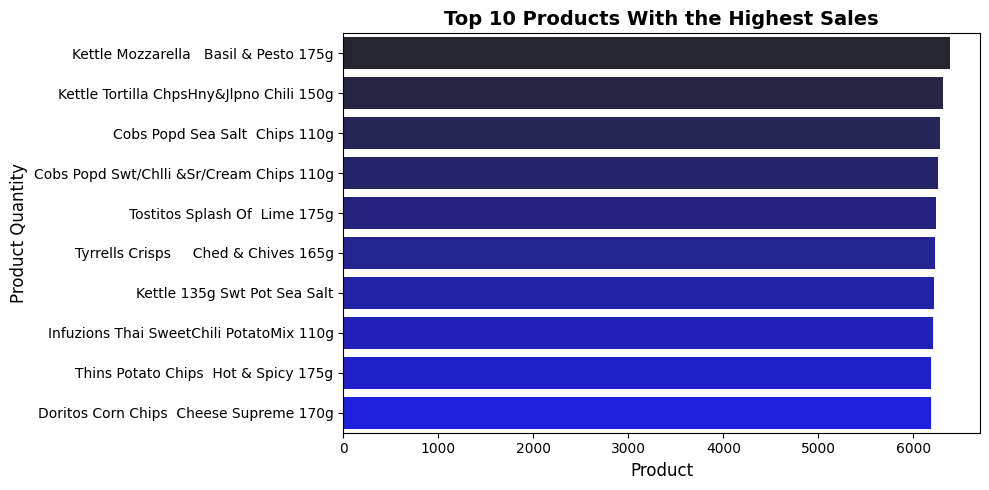

In [25]:
# Plot top10 most purchased products
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_products, y='PROD_NAME', x = 'PROD_QTY', palette='dark:b', hue='PROD_NAME', legend=None)

plt.title('Top 10 Products With the Highest Sales', fontsize=14, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Product Quantity', fontsize=12)

#plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


DATASET 2

In [26]:
purchase_behaviour_data= pd.read_csv(r'QVI_purchase_behaviour.csv')
purchase_behaviour_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [27]:
purchase_behaviour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
purchase_behaviour_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

MERGE BOTH DATA

In [29]:
data = pd.merge(transaction_data, purchase_behaviour_data, on = 'LYLTY_CARD_NBR', how = 'left'	 )
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [30]:
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [31]:
data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118


In [32]:
# Creating a new dataset with the merged data
data.to_csv('chips_store_data.csv', index=False)

 Who spends the most on chips describing customers by lifestage and
 how premium their general purchasing behaviour is

In [33]:
top_spenders = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False).reset_index().head()
top_spenders


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,OLDER FAMILIES,Budget,156863.75
1,YOUNG SINGLES/COUPLES,Mainstream,147582.20
2,RETIREES,Mainstream,145168.95
3,YOUNG FAMILIES,Budget,129717.95
4,OLDER SINGLES/COUPLES,Budget,127833.60


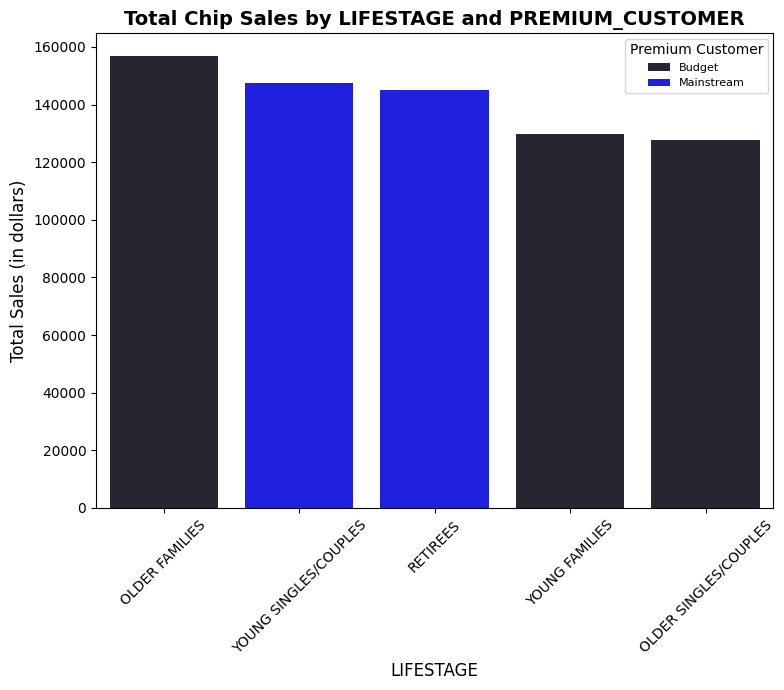

In [34]:
# Plot the result
plt.figure(figsize=(8, 7))
sns.barplot(data=top_spenders, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='dark:b')

plt.title('Total Chip Sales by LIFESTAGE and PREMIUM_CUSTOMER', fontsize=14, fontweight='bold')
plt.xlabel('LIFESTAGE', fontsize=12)
plt.ylabel('Total Sales (in dollars)', fontsize=12)

plt.xticks(rotation=45)
plt.legend(title='Premium Customer', fontsize=8, title_fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()

How many customers are in each segment

In [35]:
segment_count = data.groupby('PREMIUM_CUSTOMER').size().sort_values(ascending=False).reset_index(name='CUSTOMER_COUNT')
segment_count

,PREMIUM_CUSTOMER,CUSTOMER_COUNT
0,Mainstream,95043
1,Budget,86762
2,Premium,64935


 How many chips are bought per customer by segment

In [36]:
quantity_by_segment = data.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum().sort_values(ascending=False).reset_index()
quantity_by_segment

,PREMIUM_CUSTOMER,PROD_QTY
0,Mainstream,180780
1,Budget,165774
2,Premium,123845


Top 5 customers that purchase chips the most

In [37]:
chips_per_customer = data.groupby(['LYLTY_CARD_NBR', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().sort_values(ascending=False).reset_index().head()
chips_per_customer_sorted = chips_per_customer.sort_values(by='PROD_QTY', ascending=False)
chips_per_customer_sorted

,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,PROD_QTY
0,230078,Budget,36
1,162039,Mainstream,34
2,113080,Mainstream,32
3,116181,Premium,32
4,179228,Budget,32


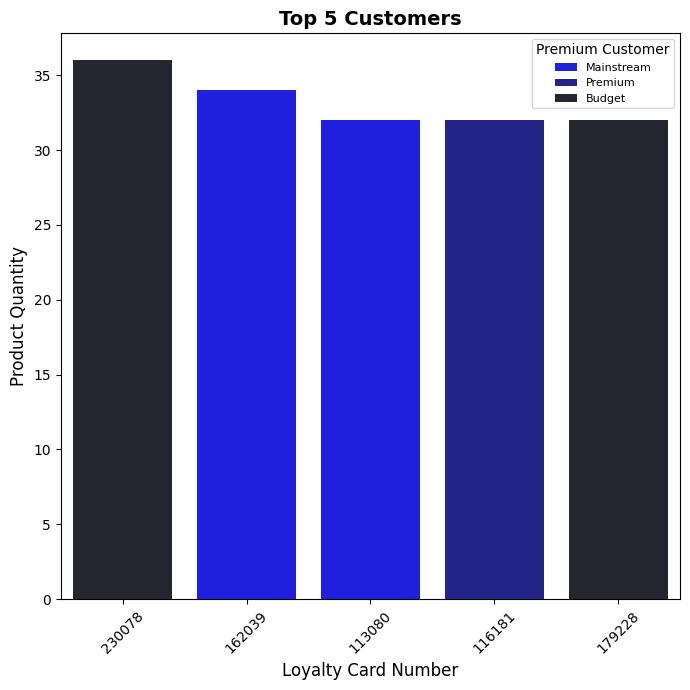

In [38]:
# Plot the result with explicit ordering
plt.figure(figsize=(7, 7))
sns.barplot(data=chips_per_customer_sorted, x='LYLTY_CARD_NBR', y='PROD_QTY', hue='PREMIUM_CUSTOMER', 
            palette='dark:b_r', order=chips_per_customer_sorted['LYLTY_CARD_NBR'])

plt.title('Top 5 Customers', fontsize=14, fontweight='bold')
plt.xlabel('Loyalty Card Number', fontsize=12)
plt.ylabel('Product Quantity', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title='Premium Customer', fontsize=8, title_fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()


What's the average chip price by  customer segment


In [ ]:
# avg_chip_price2 = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].mean().sort_values(ascending=False).reset_index()
# avg_chip_price2

In [40]:
avg_chip_price = data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean().sort_values(ascending=False).reset_index()
avg_chip_price

,PREMIUM_CUSTOMER,TOT_SALES
0,Mainstream,7.374193
1,Premium,7.282751
2,Budget,7.277458


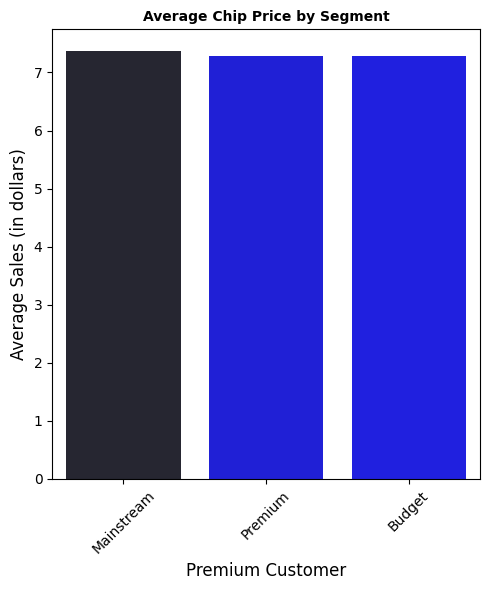

In [50]:
# Plot the result
plt.figure(figsize=(5, 6))
sns.barplot(data =avg_chip_price, x='PREMIUM_CUSTOMER', y='TOT_SALES', palette='dark:b_r',hue= 'TOT_SALES', legend = None)

plt.title('Average Chip Price by Segment', fontsize=10, fontweight='bold')
plt.xlabel('Premium Customer', fontsize=12)
plt.ylabel('Average Sales (in dollars)', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

T-Test to confirm the level of significance difference in average price per unit between lifestages

In [42]:
from scipy.stats import ttest_ind

# Filter data for Mainstream and Premium customers in Midage and Young Singles/Couples lifestages
mainstream_data = data[(data['PREMIUM_CUSTOMER'] == 'Mainstream') &
                       (data['LIFESTAGE'].isin(['Midage', 'Young Singles/Couples']))]['TOT_SALES']

premium_data = data[(data['PREMIUM_CUSTOMER'] == 'Premium') &
                    (data['LIFESTAGE'].isin(['Midage', 'Young Singles/Couples']))]['TOT_SALES']

# Perform the independent t-test
mainstream_vs_premium = ttest_ind(mainstream_data, premium_data, equal_var=False)

# Print the results
print("T-Test between Mainstream and Premium in Midage and Young Singles/Couples:")
print(f"t-statistic: {mainstream_vs_premium.statistic:.3f}, p-value: {mainstream_vs_premium.pvalue:.3f}")

# Interpretation of results
if mainstream_vs_premium.pvalue < 0.05:
    print("The difference between Mainstream and Premium customers in these lifestages is statistically significant.")
else:
    print("No statistically significant difference between Mainstream and Premium customers in these lifestages.")


T-Test between Mainstream and Premium in Midage and Young Singles/Couples:
t-statistic: nan, p-value: nan
No statistically significant difference between Mainstream and Premium customers in these lifestages.


C:\Users\allen\AppData\Local\Temp\ipykernel_6908\515844086.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  mainstream_vs_premium = ttest_ind(mainstream_data, premium_data, equal_var=False)


What are the Most Purchased Brand Mainstream - young singles/couples

In [ ]:
# # Filter data for Mainstream - young singles/couples
# mainstream_young_data = data[
#     (data['PREMIUM_CUSTOMER'].str.strip().str.lower() == 'mainstream') &
#     (data['LIFESTAGE'].str.strip().str.lower() == 'young singles/couples')
# ]

# # Group by BRAND and calculate total sales
# segment_brand_sales = (mainstream_young_data.groupby('BRAND')['TOT_SALES'].sum().reset_index() .sort_values(by='TOT_SALES', ascending=False).head())

# # Display the results (will be empty if no matching data exists)
# segment_brand_sales


# # Plot the result
# plt.figure(figsize=(7, 5))
# sns.barplot(data =segment_brand_sales, x='BRAND', y='TOT_SALES', palette='dark:b_r',hue= 'TOT_SALES', legend = None)

# plt.title('Most Purchased Brand Mainstream - Young Singles/Couples', fontsize=10, fontweight='bold')
# plt.xlabel('Brand', fontsize=12)
# plt.ylabel('Total Sales (in dollars)', fontsize=12)

# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

In [ ]:
# USING THE AFINITY METHOD
# Filter data for Mainstream - young singles/couples
mainstream_young_data = data[
    (data['PREMIUM_CUSTOMER'].str.strip().str.lower() == 'mainstream') &
    (data['LIFESTAGE'].str.strip().str.lower() == 'young singles/couples')
]

# Check if the filtered dataset is empty
if mainstream_young_data.empty:
    print("No data found for the specified segment.")
else:
    # Calculate brand preferences for the specific segment
    segment_brand_sales = mainstream_young_data.groupby('BRAND')['TOT_SALES'].sum().reset_index()
    segment_brand_sales.rename(columns={'TOT_SALES': 'SEGMENT_SALES'}, inplace=True)
    segment_brand_sales['SEGMENT_PROPORTION'] = (segment_brand_sales['SEGMENT_SALES'] / segment_brand_sales['SEGMENT_SALES'].sum())

    # Calculate overall brand preferences across all customer segments
    overall_brand_sales = data.groupby('BRAND')['TOT_SALES'].sum().reset_index()
    overall_brand_sales.rename(columns={'TOT_SALES': 'OVERALL_SALES'}, inplace=True)
    overall_brand_sales['OVERALL_PROPORTION'] = (overall_brand_sales['OVERALL_SALES'] / overall_brand_sales['OVERALL_SALES'].sum())

    # Merge the two datasets for comparison
    brand_analysis = pd.merge(segment_brand_sales, overall_brand_sales, on='BRAND', how='inner')

    # Calculate the lift (affinity measure)
    brand_analysis['LIFT'] = (brand_analysis['SEGMENT_PROPORTION'] / brand_analysis['OVERALL_PROPORTION'])

    # Sort by lift to identify brands with the strongest affinity
   # brand_analysis_sorted = brand_analysis.sort_values(by='LIFT', ascending=False)
  
    brand_analysis_sorted = brand_analysis.sort_values(by='LIFT', ascending=False)


# Display the top brands
brand_analysis_sorted.head(10)

    

,BRAND,SEGMENT_SALES,SEGMENT_PROPORTION,OVERALL_SALES,OVERALL_PROPORTION,LIFT
5,Dorito,3659.5,0.024796,39052.0,0.021633,1.146211
25,Tyrrells,4800.6,0.032528,51647.4,0.028611,1.136928
24,Twisties,7539.8,0.051089,81522.1,0.045160,1.131281
6,Doritos,17266.4,0.116995,187277.9,0.103745,1.127720
12,Kettle,35423.6,0.240026,390239.8,0.216178,1.110317
23,Tostitos,7238.0,0.049044,79789.6,0.044200,1.109579
11,Infzns,2055.8,0.013930,22800.0,0.012630,1.102889
15,Pringles,16006.2,0.108456,177655.5,0.098414,1.102035
8,Grain,3798.0,0.025735,43048.8,0.023847,1.079145
10,Infuzions,6693.6,0.045355,76247.6,0.042238,1.073791


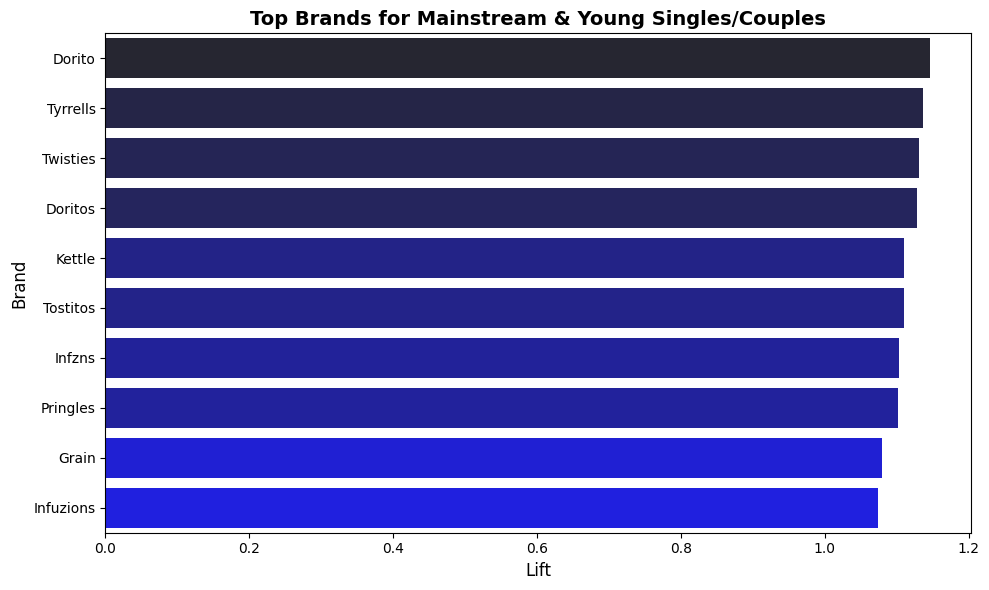

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_analysis_sorted.head(10).sort_values(by='LIFT', ascending= False), x='LIFT', y='BRAND', 
            palette='dark:b_r',  hue='LIFT', legend= None)

plt.title("Top Brands for Mainstream & Young Singles/Couples", fontsize=14, fontweight='bold')
plt.xlabel("Lift", fontsize=12)
plt.ylabel("Brand", fontsize=12)

plt.tight_layout()
plt.show()

What is the most preferred pack size by Mainstream - young singles/couples

In [46]:
# Filter data for Mainstream - young singles/couples
mainstream_young_data = data[
    (data['PREMIUM_CUSTOMER'].str.strip().str.lower() == 'mainstream') &
    (data['LIFESTAGE'].str.strip().str.lower() == 'young singles/couples')
]

# Check if the filtered dataset is empty
if mainstream_young_data.empty:
    print("No data found for the specified segment.")
else:
    # Calculate pack size preferences for the target segment
    segment_pack_sales = mainstream_young_data.groupby('PACK_SIZE')['TOT_SALES'].sum().reset_index()
    segment_pack_sales.rename(columns={'TOT_SALES': 'SEGMENT_SALES'}, inplace=True)
    segment_pack_sales['SEGMENT_PROPORTION'] = (segment_pack_sales['SEGMENT_SALES'] / segment_pack_sales['SEGMENT_SALES'].sum())

    # Calculate overall pack size preferences across all customer segments
    overall_pack_sales = data.groupby('PACK_SIZE')['TOT_SALES'].sum().reset_index()
    overall_pack_sales.rename(columns={'TOT_SALES': 'OVERALL_SALES'}, inplace=True)
    overall_pack_sales['OVERALL_PROPORTION'] = (overall_pack_sales['OVERALL_SALES'] / overall_pack_sales['OVERALL_SALES'].sum())

    # Merge the two datasets for comparison
    pack_analysis = pd.merge(segment_pack_sales, overall_pack_sales, on='PACK_SIZE', how='inner')

    # Calculate the lift (affinity measure)
    pack_analysis['LIFT'] = (pack_analysis['SEGMENT_PROPORTION'] / pack_analysis['OVERALL_PROPORTION'])

    # Sort by lift to identify pack sizes with the strongest affinity
    pack_analysis_sorted = pack_analysis.sort_values(by='LIFT', ascending=False)

# Display the top pack sizes
pack_analysis_sorted.head(10)


,PACK_SIZE,SEGMENT_SALES,SEGMENT_PROPORTION,OVERALL_SALES,OVERALL_PROPORTION,LIFT
17,270,5303.8,0.035938,55425.4,0.030704,1.170481
19,380,7175.9,0.048623,75419.6,0.041780,1.163799
18,330,12654.0,0.085742,136794.3,0.075779,1.131477
4,134,16006.2,0.108456,177655.5,0.098414,1.102035
2,110,14630.0,0.099131,162765.4,0.090166,1.099432
14,210,3798.0,0.025735,43048.8,0.023847,1.079145
5,135,2247.0,0.015225,26090.4,0.014453,1.053436
16,250,2236.0,0.015151,26096.7,0.014457,1.048026
9,170,11893.4,0.080588,146673.0,0.081251,0.991840
6,150,22946.2,0.155481,289681.8,0.160473,0.968892


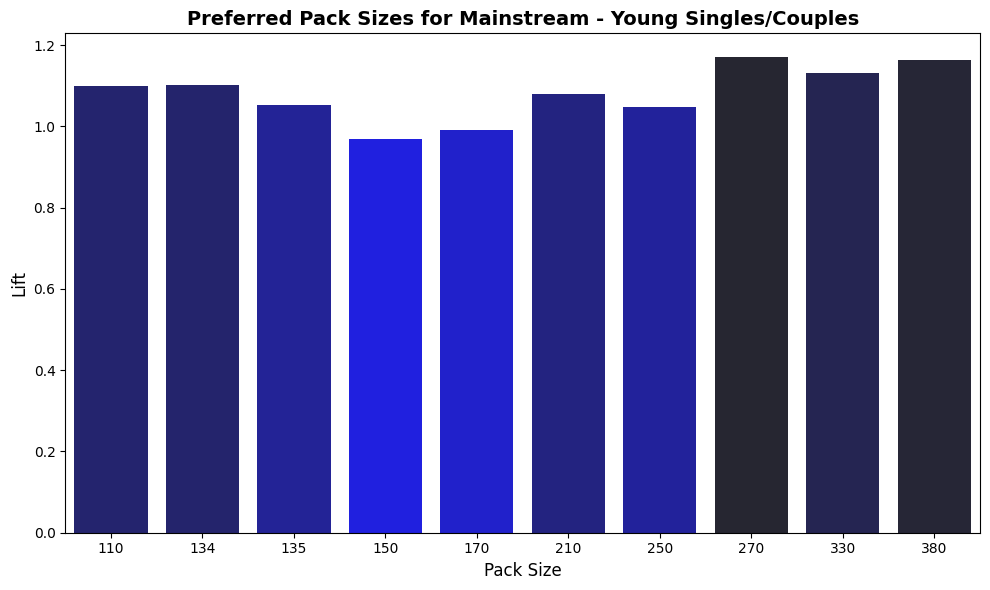

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pack_analysis_sorted.head(10).sort_values(by='LIFT',ascending=False), x='PACK_SIZE', y='LIFT', 
            palette='dark:b_r', hue='LIFT', legend= None)

plt.title("Preferred Pack Sizes for Mainstream - Young Singles/Couples", fontsize=14, fontweight='bold')
plt.xlabel("Pack Size", fontsize=12)
plt.ylabel("Lift", fontsize=12)
plt.tight_layout()
plt.show()


In [48]:
data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')